In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../data/retail_sales_dataset.csv')

In [5]:
df.head(50)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [6]:
# Supongamos que 'df' es tu DataFrame y la columna con las fechas se llama 'Date'
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Verifica que la conversión fue exitosa
print(df['Date'].head())

0   2023-11-24
1   2023-02-27
2   2023-01-13
3   2023-05-21
4   2023-05-06
Name: Date, dtype: datetime64[ns]


In [8]:
# Ver las columnas que no son numéricas
print(df.select_dtypes(exclude=['float64', 'int64']).columns)


Index(['Date', 'Customer ID', 'Gender', 'Product Category'], dtype='object')


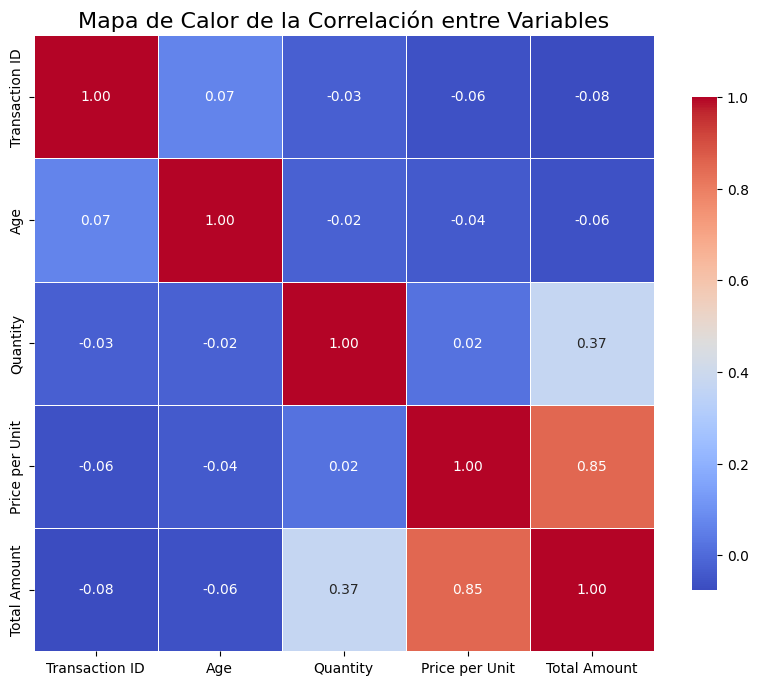

In [9]:
# Seleccionar solo columnas numéricas para calcular la correlación
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular la correlación entre las columnas numéricas
corr_matrix = df_numeric.corr()

# Mostrar la matriz de correlación en un mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Mapa de Calor de la Correlación entre Variables', fontsize=16)
plt.show()


C:\Users\Belen Lugo\AppData\Local\Temp\ipykernel_9472\1920627705.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product Category', y='Total Amount', ax=axes[1, 0], palette='coolwarm')
C:\Users\Belen Lugo\AppData\Local\Temp\ipykernel_9472\1920627705.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Total Amount', ax=axes[1, 1], palette='Set2')


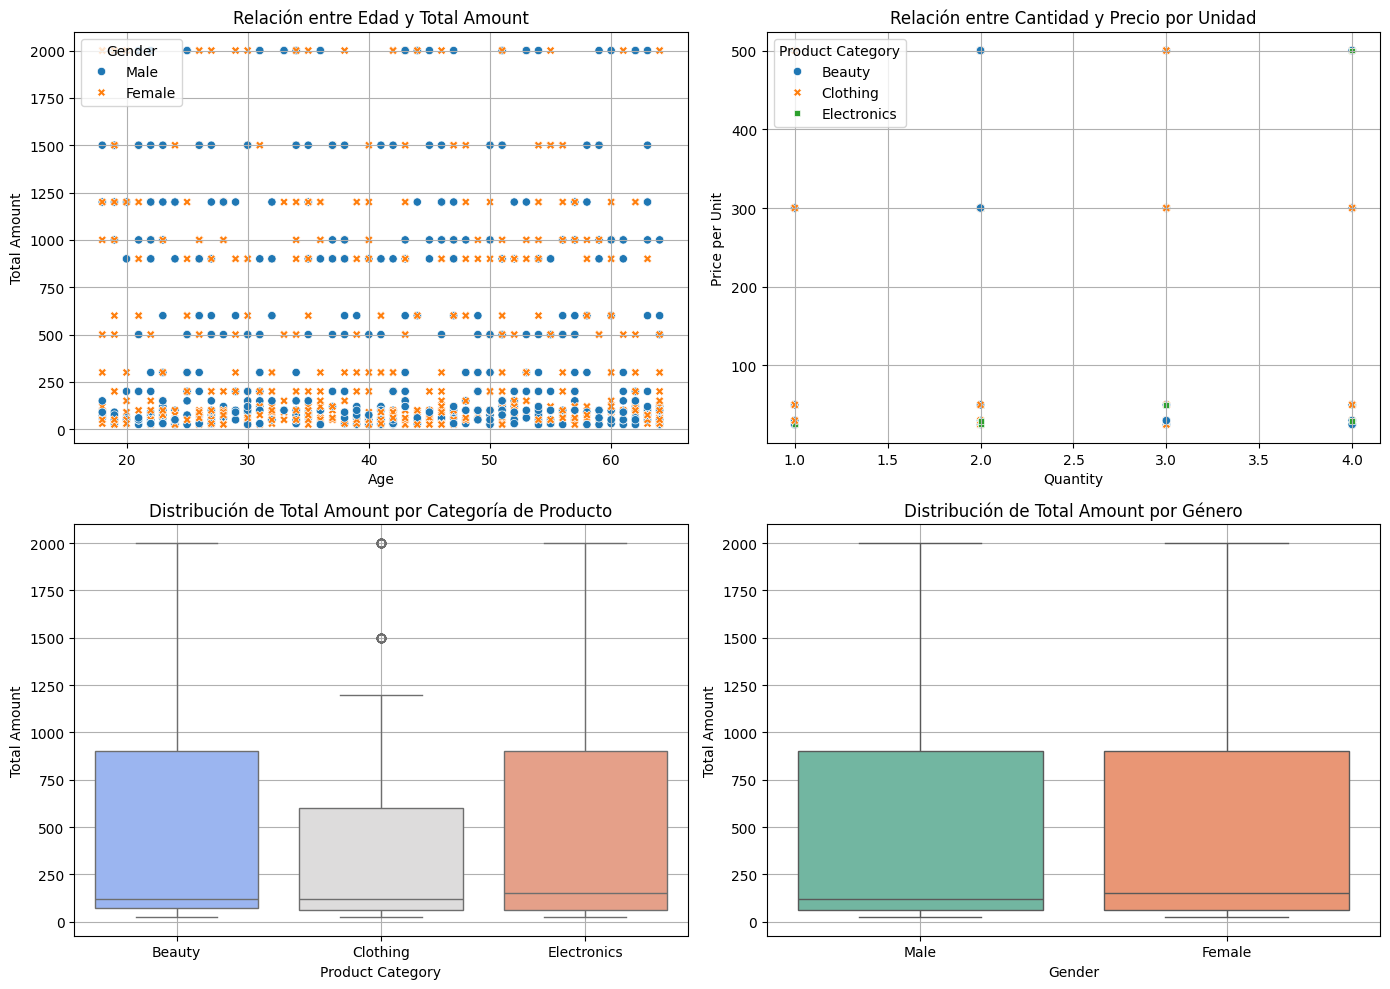

In [11]:
# Crear una figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Comparación de 'Age' y 'Total Amount' con scatterplot
sns.scatterplot(data=df, x='Age', y='Total Amount', ax=axes[0, 0], hue='Gender', style='Gender')
axes[0, 0].set_title('Relación entre Edad y Total Amount')
axes[0, 0].grid(True)
axes[0, 0].legend(title='Gender', loc='upper left')

# Comparación de 'Quantity' y 'Price per Unit' con scatterplot
sns.scatterplot(data=df, x='Quantity', y='Price per Unit', ax=axes[0, 1], hue='Product Category', style='Product Category')
axes[0, 1].set_title('Relación entre Cantidad y Precio por Unidad')
axes[0, 1].grid(True)
axes[0, 1].legend(title='Product Category', loc='upper left')

# Comparación de 'Total Amount' por 'Product Category' con boxplot
sns.boxplot(data=df, x='Product Category', y='Total Amount', ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Distribución de Total Amount por Categoría de Producto')
axes[1, 0].grid(True)

# Comparación de 'Total Amount' por 'Gender' con boxplot
sns.boxplot(data=df, x='Gender', y='Total Amount', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Distribución de Total Amount por Género')
axes[1, 1].grid(True)

# Ajustar los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()
